# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

import pickle

In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv',index_col=0)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df_raw.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C


In [5]:
df_raw.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_raw.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Hago drop a los datos de la cabina y en los faltantes de la edad le completo con la media 

In [4]:
df_raw = df_raw.drop(columns='Cabin', axis=1)

In [5]:
df_raw['Age'] = df_raw['Age'].fillna(df_raw['Age'].mean())
df_raw['Embarked'] = df_raw['Embarked'].fillna(df_raw['Embarked'].mode()[0])

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [6]:
df = df_raw.copy()

In [7]:
X = df.drop(columns=['Ticket', 'Name', 'Survived'])
y= df['Survived']

In [8]:
X [['Sex', 'Embarked']] = X [['Sex', 'Embarked']].astype('category')

In [9]:
X['Sex'] = X['Sex'].cat.codes

In [10]:
X['Embarked'] = X['Embarked'].cat.codes

In [25]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1107)

In [12]:
classifer = RandomForestClassifier()

In [13]:
classifer.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = classifer.predict(X_test)

In [15]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       141
           1       0.82      0.72      0.77        82

    accuracy                           0.84       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



### Buscamos los mejores Hiperparámetros

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # común es auto, sqrt le hace al valor que le pase

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Criterio
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features, #son pocas variables
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [17]:
classifer_grid = RandomForestClassifier(random_state=1107)
classifer_grid_random = RandomizedSearchCV (estimator=classifer_grid, n_iter=100, cv=5, random_state=1107, param_distributions= random_grid)

In [18]:
classifer_grid_random.fit(X_train, y_train)

#### El mejor modelo es

In [43]:
classifer_grid_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': True}

In [48]:
classifer_with_grid = RandomForestClassifier(n_estimators= 400, min_samples_split= 10, min_samples_leaf = 2, max_depth = 90, criterion= 'entropy', bootstrap= True)

In [49]:
classifer_with_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=90, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=400)

In [53]:
y_pred_with_grid = classifer_with_grid.predict(X_test)

#### como equilibrar los datos de los que sobrevivieron y los que no

In [54]:
print(classification_report (y_test, y_pred_with_grid))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       141
           1       0.85      0.68      0.76        82

    accuracy                           0.84       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223



In [55]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       141
           1       0.78      0.71      0.74        82

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



Feature: 0, Score: 0.11271
Feature: 1, Score: 0.32306
Feature: 2, Score: 0.19692
Feature: 3, Score: 0.05382
Feature: 4, Score: 0.03492
Feature: 5, Score: 0.24097
Feature: 6, Score: 0.03760


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


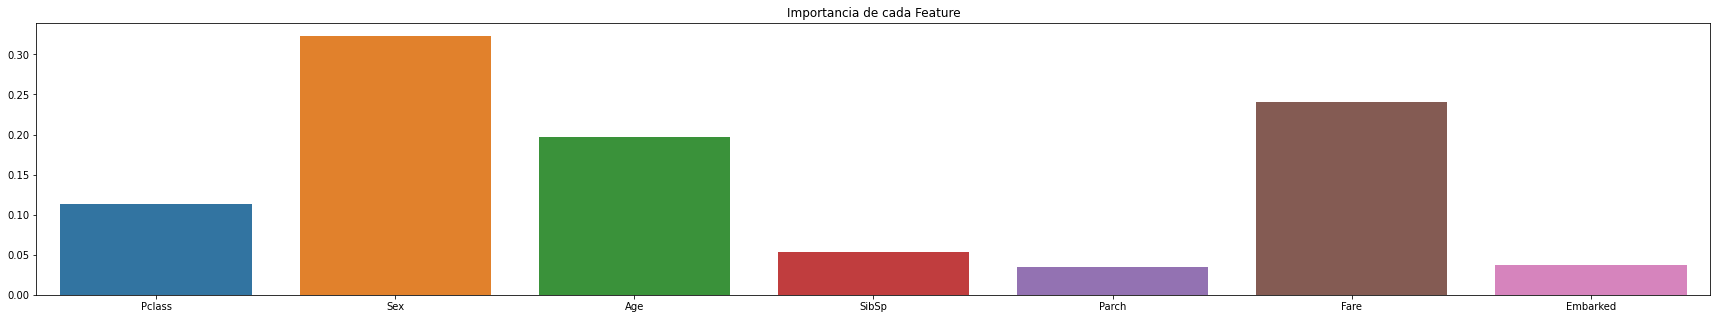

In [58]:
importance = classifer_with_grid.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# graficamos la importancia de las variables

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, importance)
plt.title('Importancia de cada Feature')
plt.show()

In [ ]:
filename = '/workspace/Random-Forest-Clase/models/finalized_model.sav' 
pickle.dump(classifer_with_grid, open(filename, 'wb'))